In [3]:
%load_ext autoreload
%autoreload 2

In [11]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn import svm
from sklearn.pipeline import Pipeline
from pandas_profiling import ProfileReport

In [5]:
import sklearn

sklearn.__version__

'1.1.2'

### Erster Blick in die Daten

In [131]:
URL = "https://datahub.io/machine-learning/adult/r/adult.csv"
#raw_data = os.path.join( "data", "data.csv")
raw_data = os.path.join("adult_csv.csv")
df_raw = pd.read_csv(raw_data, sep = ",")


In [7]:
df_raw.shape

(48842, 15)

In [132]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       46043 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      46033 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capitalgain     48842 non-null  int64 
 11  capitalloss     48842 non-null  int64 
 12  hoursperweek    48842 non-null  int64 
 13  native-country  47985 non-null  object
 14  class           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [10]:
df_raw.isna()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native-country,class
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
48838,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False
48839,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
48840,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [11]:
df_raw.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native-country,class
0,2,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,1,0,2,United-States,<=50K
1,3,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,0,United-States,<=50K
2,2,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,2,United-States,<=50K
3,3,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,2,United-States,<=50K
4,1,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,2,Cuba,<=50K


In [9]:
df_raw.describe().T

,count,mean,std,min,25%,50%,75%,max
age,48842.0,1.771078,1.295378,0.0,1.0,2.0,3.0,4.0
fnlwgt,48842.0,189664.134597,105604.025423,12285.0,117550.5,178144.5,237642.0,1490400.0
education-num,48842.0,10.078089,2.570973,1.0,9.0,10.0,12.0,16.0
capitalgain,48842.0,0.200319,0.746182,0.0,0.0,0.0,0.0,4.0
capitalloss,48842.0,0.114942,0.556924,0.0,0.0,0.0,0.0,4.0
hoursperweek,48842.0,1.950698,0.897038,0.0,2.0,2.0,2.0,4.0


In [20]:
print(df_raw.columns)

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capitalgain', 'capitalloss', 'hoursperweek', 'native-country',
       'class'],
      dtype='object')


In [35]:
for col in df_raw:
    print(df_raw[col].unique())


[2 3 1 0 4]
['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov' nan
 'Self-emp-inc' 'Without-pay' 'Never-worked']
[ 77516  83311 215646 ... 173449  89686 350977]
['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 '1st-4th' 'Preschool' '12th']
[13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8]
['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated' 'Married-AF-spouse' 'Widowed']
['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Craft-repair' 'Transport-moving'
 'Farming-fishing' 'Machine-op-inspct' 'Tech-support' nan
 'Protective-serv' 'Armed-Forces' 'Priv-house-serv']
['Not-in-family' 'Husband' 'Wife' 'Own-child' 'Unmarried' 'Other-relative']
['White' 'Black' 'Asian-Pac-Islander' 'Amer-Indian-Eskimo' 'Other']
['Male' 'Female']
[1 0 4 2 3]
[0 3 1 2 4]
[2 0 3 4 1]
['United-States' 'Cuba' 'Jamaica' 'India' nan

In [38]:
df_raw.isna().sum()

age                  0
workclass         2799
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        2809
relationship         0
race                 0
sex                  0
capitalgain          0
capitalloss          0
hoursperweek         0
native-country     857
class                0
dtype: int64

<AxesSubplot: >

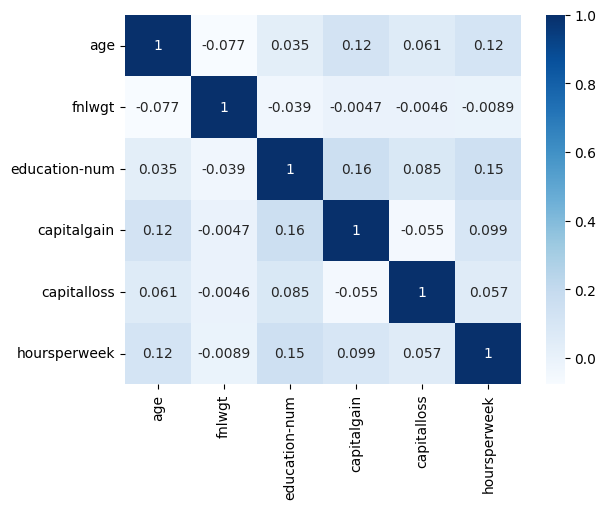

In [50]:
import seaborn as sns
%matplotlib inline
corr = df_raw.corr()
sns.heatmap(corr, cmap="Blues", annot=True)

### Summary aus dem Datensatz

1. Age bereits geclustert in 5 Kategorien


### Pandas Profiling Report
auskommentiert wegen GitHub

In [122]:
#html profile report erstellen um eine detaillierte Übersicht über die Zusammenhänge innerhalb des Datensatzes zu generieren
#profile = ProfileReport(df_raw, title="Countries Profiling Report", explorative=True)
#profile.to_notebook_iframe()

c:\Users\Lennart Reschke\anaconda3\envs\ads3-06-dash\lib\site-packages\seaborn\distributions.py:254: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  baselines.iloc[:, cols] = (curves


<AxesSubplot: xlabel='education-num', ylabel='Count'>

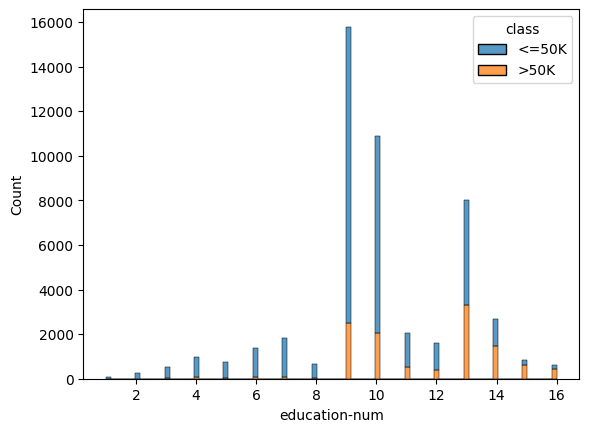

In [76]:
sns.histplot(data=df_raw, x="education-num", hue="class", multiple="stack")

#Obwohl Korrelation zwischen education und education-num, Column wird nicht entfernt, da abnehmende "Skalenerträge" = Bei Grenze von 10 Jahren Education Anteil von >50k geht runter

### Scaling
Welche Kateogiren müssen gescalet werden? Scaling von fnlwgt

In [148]:
from sklearn.preprocessing import MinMaxScaler, QuantileTransformer, RobustScaler, StandardScaler

In [149]:
#Standard Scaler:
sd_scaler = StandardScaler()
sd_scaler.fit(df_raw[["fnlwgt"]])
sd_t = sd_scaler.transform(df_raw[["fnlwgt"]])
print(sd_t)
display(pd.DataFrame(sd_t).describe())

[[-1.06197924]
 [-1.00710388]
 [ 0.24603353]
 ...
 [ 1.75486457]
 [-1.00161161]
 [-0.07117353]]


,0
count,4.884200e+04
mean,-5.644539e-17
std,1.000010e+00
min,-1.679680e+00
25%,-6.828752e-01
50%,-1.090844e-01
75%,4.543232e-01
max,1.231723e+01


In [151]:
#Robust Scaler:
rob_scaler = RobustScaler()
rob_scaler.fit(df_raw[["fnlwgt"]])
rob_t = rob_scaler.transform(df_raw[["fnlwgt"]])
print(rob_t)
display(pd.DataFrame(rob_t).describe())

[[-0.83793191]
 [-0.78967704]
 [ 0.31227439]
 ...
 [ 1.63907104]
 [-0.78484739]
 [ 0.03333708]]


,0
count,48842.000000
mean,0.095924
std,0.879363
min,-1.381109
25%,-0.504565
50%,0.000000
75%,0.495435
max,10.927131


In [152]:
#MinMaxScaler:
mm_scaler = MinMaxScaler()
mm_scaler.fit(df_raw[["fnlwgt"]])
mm_t = mm_scaler.transform(df_raw[["fnlwgt"]])
print(mm_t)
display(pd.DataFrame(mm_t).describe())

[[0.04413121]
 [0.04805174]
 [0.13758131]
 ...
 [0.24537874]
 [0.04844413]
 [0.11491866]]


,0
count,48842.000000
mean,0.120004
std,0.071445
min,0.000000
25%,0.071216
50%,0.112210
75%,0.152462
max,1.000000


In [154]:
#QuantileScaler:
qt = QuantileTransformer()
qt.fit(df_raw[["fnlwgt"]])
qt_t = qt.transform(df_raw[["fnlwgt"]])
print(qt_t)
display(pd.DataFrame(qt_t).describe())

[[0.12078165]
 [0.1319937 ]
 [0.68506202]
 ...
 [0.94615963]
 [0.13354748]
 [0.51944007]]


,0
count,48842.000000
mean,0.500000
std,0.288685
min,0.000000
25%,0.250058
50%,0.499896
75%,0.750060
max,1.000000


In [155]:
#Vergleich der Scaler
Sc_Vgl = pd.DataFrame(
    {
        "Standard": sd_t.flatten(),
        "Robust": rob_t.flatten(),
        "MinMax": mm_t.flatten(),
        "QuantileTransformer": qt_t.flatten(),
    }
)
display(Sc_Vgl.head())

,Standard,Robust,MinMax,QuantileTransformer
0,-1.061979,-0.837932,0.044131,0.120782
1,-1.007104,-0.789677,0.048052,0.131994
2,0.246034,0.312274,0.137581,0.685062
3,0.426663,0.471112,0.150486,0.741929
4,1.408530,1.334520,0.220635,0.911313


<AxesSubplot: ylabel='Density'>

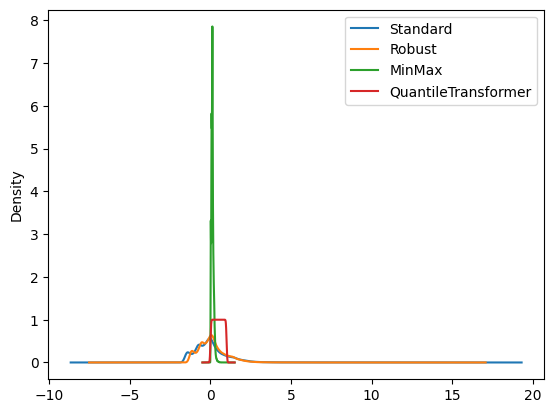

In [156]:
Sc_Vgl.plot.kde()

In [158]:
#Ergebnis zeigt: Standard & Robust Scaler liefern beinahe identische Ergebnisse. Daher wird der StandardScaler für das Feature "fnlwgt" ausgewählt
#The continuous variable fnlwgt represents final weight, which is the number of units in the target population that the responding unit represents.

### Zusammenlegung von Workclass rare categories

In [127]:
df_raw["workclass"].value_counts()

Private             33906
Self-emp-not-inc     3862
Local-gov            3136
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Nan                    31
Name: workclass, dtype: int64

In [135]:
workclass_count = df_raw["workclass"].value_counts()
Nan_workclass = workclass_count[workclass_count < 100].index.to_list()

In [136]:
df_raw["workclass"] = df_raw["workclass"].astype("object")
df_raw.loc[df_raw.query(f"workclass == @Nan_workclass").index, "workclass"] = "Nan"

In [137]:
df_raw["workclass"].value_counts()

Private             33906
Self-emp-not-inc     3862
Local-gov            3136
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Nan                    31
Name: workclass, dtype: int64

In [ ]:
df_raw["marital-status"].value_counts()

Married-civ-spouse       22379
Never-married            16117
Divorced                  6633
Separated                 1530
Widowed                   1518
Married-spouse-absent      628
Married-AF-spouse           37
Name: marital-status, dtype: int64

In [138]:
df_raw.rename(columns={"marital-status":"marital_status"}, inplace=True)


In [139]:
df_raw.head()

,age,workclass,fnlwgt,education,education-num,marital_status,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native-country,class
0,2,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,1,0,2,United-States,<=50K
1,3,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,0,United-States,<=50K
2,2,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,2,United-States,<=50K
3,3,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,2,United-States,<=50K
4,1,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,2,Cuba,<=50K


In [140]:
marital_status_count = df_raw["marital_status"].value_counts()
rare_marital_status = marital_status_count[marital_status_count < 1000].index.to_list()

In [141]:
rare_marital_status

['Married-spouse-absent', 'Married-AF-spouse']

In [142]:
df_raw["marital_status"] = df_raw["marital_status"].astype("object")
df_raw.loc[df_raw.query(f"marital_status == @rare_marital_status").index, "marital_status"] = "Married-civ-spouse"

In [143]:
df_raw["marital_status"].value_counts()

Married-civ-spouse    23044
Never-married         16117
Divorced               6633
Separated              1530
Widowed                1518
Name: marital_status, dtype: int64

### Zusammenlegung von Self-emps und Gov als Untersuchungsmöglichkeit 

### Data Wrangling

In [159]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier

In [163]:
train_data, test_data = train_test_split(df_raw, test_size=0.2, random_state=42)
train_dist = pd.DataFrame(train_data["class"].value_counts() / len(train_data))
train_dist.columns = ["class_train_perc"]
display(train_dist[:5])

,class_train_perc
<=50K,0.761165
>50K,0.238835


In [164]:
test_dist = pd.DataFrame(test_data["class"].value_counts() / len(test_data))
test_dist.columns = ["class_test_perc"]

In [165]:
dist = pd.merge(train_dist, test_dist, left_index=True, right_index=True)
dist["diff"] = (dist["class_train_perc"] - dist["class_test_perc"]).abs()

In [166]:
display(dist.sort_values(by="class_train_perc", ascending=False)[:20])

,class_train_perc,class_test_perc,diff
<=50K,0.761165,0.758931,0.002234
>50K,0.238835,0.241069,0.002234


In [167]:
df_raw.head()

,age,workclass,fnlwgt,education,education-num,marital_status,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native-country,class
0,2,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,1,0,2,United-States,<=50K
1,3,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,0,United-States,<=50K
2,2,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,2,United-States,<=50K
3,3,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,2,United-States,<=50K
4,1,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,2,Cuba,<=50K


#### Einteilung Cat und Num Features

In [168]:
num_features = ["fnlwgt", "education-num"]
cat_features = ["age", "workclass", "education", "marital_status", "occupation", "relationship", "race", "sex", "capitalgain", "capitalloss", "hoursperweek", "native-country"]

y = ["class"]
X = [*num_features, *cat_features]

### Transformation der Features

In [169]:
ohe_ft = OneHotEncoder().fit_transform(train_data[cat_features])
ohe_ft

<39073x118 sparse matrix of type '<class 'numpy.float64'>'
	with 468876 stored elements in Compressed Sparse Row format>

In [170]:
ct = ColumnTransformer(
    remainder="drop",
    transformers=[
        ("std_scaler", StandardScaler(), num_features),
        ("ohe", OneHotEncoder(handle_unknown="ignore"), cat_features),
    ],
)

In [171]:
ct_transformed = ct.fit_transform(train_data[X])
ct_transformed

<39073x120 sparse matrix of type '<class 'numpy.float64'>'
	with 547022 stored elements in Compressed Sparse Row format>

In [172]:
ct.get_feature_names_out()[:15]

array(['std_scaler__fnlwgt', 'std_scaler__education-num', 'ohe__age_0',
       'ohe__age_1', 'ohe__age_2', 'ohe__age_3', 'ohe__age_4',
       'ohe__workclass_Federal-gov', 'ohe__workclass_Local-gov',
       'ohe__workclass_Nan', 'ohe__workclass_Private',
       'ohe__workclass_Self-emp-inc', 'ohe__workclass_Self-emp-not-inc',
       'ohe__workclass_State-gov', 'ohe__workclass_nan'], dtype=object)

### check Zwischenergebnis

In [173]:
clf = DecisionTreeClassifier(random_state=0)

In [174]:
#Crossvalidation
cross_val_score(clf, ct.fit_transform(train_data[X]), train_data[y], cv=5)

array([0.79462572, 0.80409469, 0.79705694, 0.79626312, 0.80176606])

In [175]:
clf.fit(ct.transform(train_data[X]), train_data[y])

DecisionTreeClassifier(random_state=0)

In [176]:
clf.score(ct.transform(test_data[X]), test_data[y])

0.7977275053741427

### Pipeline

In [177]:
num_step = Pipeline(
    steps=[
        ("std_scaler", StandardScaler()),
    ]
)

In [178]:
prep_steps = ColumnTransformer(
    transformers=[
        ("num", num_step, num_features),
        ("ohe", OneHotEncoder(sparse=False, handle_unknown="ignore"), cat_features),
    ],
    remainder="drop",
)

In [179]:
pipeline = Pipeline(
    [("preprocessing", prep_steps), ("model", DecisionTreeClassifier(random_state=42))]
)

In [180]:
pipeline.fit(train_data[X], train_data[y])

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('std_scaler',
                                                                   StandardScaler())]),
                                                  ['fnlwgt', 'education-num']),
                                                 ('ohe',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['age', 'workclass',
                                                   'education',
                                                   'marital_status',
                                                   'occupation', 'relationship',
                                                   'race', 'sex', 'capitalgain',
                                                   'capitalloss',
                                                   'hoursperweek',
                                                   'native-country'])])),
                ('model', DecisionTreeClassifier(random_state=42))])

In [181]:
cross_val_score(pipeline, train_data[X], train_data[y], cv=5)

array([0.79334613, 0.80473448, 0.79769674, 0.79703097, 0.80355772])

In [182]:
pipeline.score(test_data[X], test_data[y])

0.7984440577336472

### Check der Dimensionen

In [186]:
steps = ColumnTransformer(
    transformers=[
        ("ohe", OneHotEncoder(sparse=False), cat_features),
    ]
)

In [187]:
steps.fit_transform(train_data[cat_features])

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [188]:
pre_transform = train_data[cat_features].shape[1]
after_transform = steps.transform(train_data[cat_features]).shape[1]
print(f"Vor der Transformation gab es {pre_transform} Features, danach {after_transform}!")

Vor der Transformation gab es 12 Features, danach 118!


### PCA für Featurereduktion

In [189]:
components = 25
pca = PCA(n_components=components)
pca.fit_transform(steps.fit_transform(train_data[cat_features]))

array([[-0.99425023,  0.00659548, -0.95146855, ..., -0.01516802,
         0.02858389,  0.11653591],
       [-1.15072362,  0.33306347,  0.16955694, ...,  0.12096604,
        -0.11084436,  0.24106152],
       [-1.03665436,  0.03958389, -0.19475808, ..., -0.03489075,
        -0.47915426,  0.22429665],
       ...,
       [ 1.23369736,  0.77522163, -0.56324994, ...,  0.61122234,
        -0.38748527,  0.58692104],
       [ 1.54326417, -0.64520067,  0.49198059, ...,  0.1029447 ,
        -0.38451527,  0.29405039],
       [-1.17407155, -0.03076241,  0.45117478, ..., -0.05405666,
         0.15284117,  0.15781354]])

In [190]:
cumsum = np.cumsum(pca.explained_variance_ratio_)
cumsum

array([0.1477607 , 0.21535772, 0.27531692, 0.32329334, 0.36914208,
       0.41112166, 0.45157218, 0.4854125 , 0.51808186, 0.54819562,
       0.57427474, 0.59736556, 0.61918862, 0.63881127, 0.65749185,
       0.67548174, 0.69284783, 0.7095754 , 0.72588373, 0.7417019 ,
       0.75671352, 0.77068989, 0.78462323, 0.79762566, 0.80961011])

#### wir merken: 25 componenten erklären nur 81% der Varianz. Versuchen wir es mit mehr

In [197]:
components = 70
pca = PCA(n_components=components)
pca.fit_transform(steps.fit_transform(train_data[cat_features]))

array([[-9.94250461e-01,  6.58831532e-03, -9.51466398e-01, ...,
        -1.18217262e-03, -1.10053068e-03, -6.11877192e-04],
       [-1.15072267e+00,  3.33034023e-01,  1.69491122e-01, ...,
         1.37449866e-03,  4.72332065e-03, -7.93171117e-04],
       [-1.03665355e+00,  3.95820257e-02, -1.94781361e-01, ...,
         2.76044994e-03, -4.45756011e-03, -4.30508965e-04],
       ...,
       [ 1.23369713e+00,  7.75225443e-01, -5.63243983e-01, ...,
         1.42214269e-03, -1.67252615e-03,  3.04266177e-03],
       [ 1.54326512e+00, -6.45228127e-01,  4.91962688e-01, ...,
        -3.23300686e-03, -4.21344544e-03, -9.03252617e-04],
       [-1.17407170e+00, -3.08027408e-02,  4.51130601e-01, ...,
         7.91741972e-04, -6.68568973e-03,  1.27094795e-03]])

In [198]:
cumsum = np.cumsum(pca.explained_variance_ratio_)
cumsum

array([0.1477607 , 0.21535772, 0.27531692, 0.32329334, 0.36914208,
       0.41112167, 0.4515722 , 0.48541252, 0.51808189, 0.54819566,
       0.57427487, 0.59736629, 0.61918954, 0.63881254, 0.65749362,
       0.6754849 , 0.69285188, 0.70958227, 0.72589257, 0.74171656,
       0.75673073, 0.77071188, 0.78465863, 0.79766416, 0.80971255,
       0.82099847, 0.8310795 , 0.84049376, 0.84952059, 0.85808902,
       0.86583775, 0.87312162, 0.88024737, 0.88712949, 0.89368293,
       0.89992069, 0.90594072, 0.91158091, 0.9171685 , 0.92264734,
       0.92791207, 0.93274884, 0.93738002, 0.9419728 , 0.94628074,
       0.95040586, 0.95410129, 0.95745713, 0.96047662, 0.96342676,
       0.96613099, 0.96875351, 0.97111026, 0.97339402, 0.97564405,
       0.97759299, 0.9794788 , 0.9812164 , 0.98277717, 0.98423743,
       0.98565247, 0.98704723, 0.98816301, 0.98900907, 0.98982876,
       0.99057417, 0.99123831, 0.9918612 , 0.99241859, 0.99289173])

In [199]:
d = np.argmax(cumsum >= 0.95) + 1
d

46

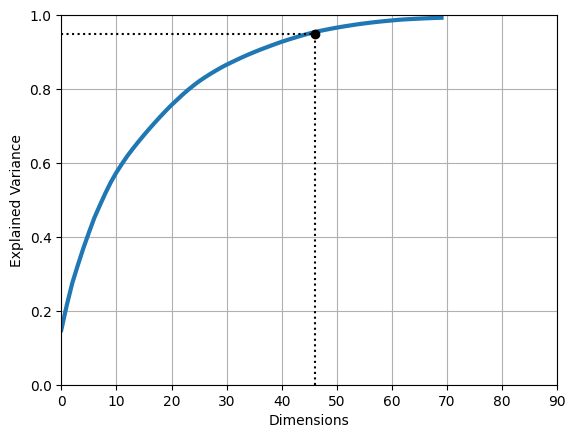

In [202]:
plt.plot(cumsum, linewidth=3)
plt.axis([0, 90, 0, 1])
plt.xlabel("Dimensions")
plt.ylabel("Explained Variance")
plt.plot([d, d], [0, 0.95], "k:")
plt.plot([0, d], [0.95, 0.95], "k:")
plt.plot(d, 0.95, "ko")
plt.grid(True)
plt.show()

In [201]:
print(f"Erklärte Varianz mit {components} Komponenten: {np.sum(pca.explained_variance_ratio_)}")
print(f"Erklärte Varianz mit {d} Komponenten: {np.sum(pca.explained_variance_ratio_[:46])}")

Erklärte Varianz mit 70 Komponenten: 0.9928917252688401
Erklärte Varianz mit 46 Komponenten: 0.9504058643519735


In [203]:
num_step_2 = Pipeline(
    steps=[
        ("std_scaler", StandardScaler()),
    ]
)
prep_steps_2 = ColumnTransformer(
    transformers=[
        ("num", num_step_2, num_features),
        ("ohe", OneHotEncoder(sparse=False, handle_unknown="ignore"), cat_features),
    ],
    remainder="drop",
)
prep_steps_2.fit(train_data)

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('std_scaler',
                                                  StandardScaler())]),
                                 ['fnlwgt', 'education-num']),
                                ('ohe',
                                 OneHotEncoder(handle_unknown='ignore',
                                               sparse=False),
                                 ['age', 'workclass', 'education',
                                  'marital_status', 'occupation',
                                  'relationship', 'race', 'sex', 'capitalgain',
                                  'capitalloss', 'hoursperweek',
                                  'native-country'])])

In [204]:
#Einbauen der PCA mit 46 Komponenten
f_out_2 = prep_steps_2.get_feature_names_out().tolist()
ohe_cols_ix_2 = [f_out_2.index(x) for x in f_out_2 if x.startswith("ohe__")]
ct_pca_2 = ColumnTransformer(
    remainder="passthrough", transformers=[("pca", PCA(n_components=46), ohe_cols_ix_2)]
)
prep_2 = Pipeline(
    [
        ("preprocessing", prep_steps_2),
        ("ct_pca", ct_pca_2),
    ]
)
pipeline_2 = Pipeline([("prep", prep_2), ("model", DecisionTreeClassifier(random_state=42))])
pipeline_2.fit(train_data[X], train_data[y])

Pipeline(steps=[('prep',
                 Pipeline(steps=[('preprocessing',
                                  ColumnTransformer(transformers=[('num',
                                                                   Pipeline(steps=[('std_scaler',
                                                                                    StandardScaler())]),
                                                                   ['fnlwgt',
                                                                    'education-num']),
                                                                  ('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False),
                                                                   ['age',
                                                                    'workclass',
                                                                    'education',
                                                                    'marital_status',
                                                                    'occupation',
                                                                    'relationship',
                                                                    'race',
                                                                    'sex',
                                                                    'capitalgain',
                                                                    'capitalloss',
                                                                    'hoursperweek',
                                                                    'native-country'])])),
                                 ('ct_pca',
                                  ColumnTransformer(remainder='passthrough',
                                                    transformers=[('pca',
                                                                   PCA(n_components=46),
                                                                   [2, 3, 4, 5,
                                                                    6, 7, 8, 9,
                                                                    10, 11, 12,
                                                                    13, 14, 15,
                                                                    16, 17, 18,
                                                                    19, 20, 21,
                                                                    22, 23, 24,
                                                                    25, 26, 27,
                                                                    28, 29, 30,
                                                                    31, ...])]))])),
                ('model', DecisionTreeClassifier(random_state=42))])

In [205]:
cross_val_score(pipeline_2[-1], prep_2.fit_transform(train_data[X]), train_data[y], cv=5)

array([0.79168266, 0.79756878, 0.79398592, 0.7843614 , 0.79267981])

In [206]:
pipeline_2.score(test_data[X], test_data[y])

0.7897430647968062

#### Reduktion der Features hat keinen Einfluss auf den Score. Mit PCA: 0.789, ohne 0.798